# 07 使用 TensorFlow Dataset 進行資料處裡

## CSV 基本的訓練方式

In [1]:
import numpy as np
# 匯入套件
import pandas as pd

# 設定小數點經度，更容易閱讀
np.set_printoptions(precision=3, suppress=True)

# 匯入 Tensorflow 與 tf.keras 套件
import tensorflow as tf

### 讀取資料集

鮑魚的資料集: [https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv](https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv)

使用此資料集推測鮑魚年齡

#### 定義欄位名稱

In [2]:
columns_name = ["長度", "直徑", "高度", "總重", "去殼重量",
                "內臟重量", "外殼重量", "年齡"]

#### 載入資料集

In [3]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=columns_name)

#### 印出前幾筆

In [4]:
abalone_train.head()

,長度,直徑,高度,總重,去殼重量,內臟重量,外殼重量,年齡
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


### 提取出標籤

In [5]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('年齡')
abalone_labels

0        7
1        6
2       14
3       16
4       13
        ..
3315    15
3316    10
3317    11
3318    16
3319    19
Name: 年齡, Length: 3320, dtype: int64

### 查看特徵

In [6]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

### 建立模型

In [7]:
abalone_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None, 7)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

#### 模型總覽

In [8]:
abalone_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 64)          512       
                                                                 
 dense_1 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 編譯模型

In [9]:
abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam())

### 訓練模型

In [10]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 1ms/step - loss: 63.2764
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 12.2599
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 8.6300
Epoch 4/10
104/104 [==============================] - 0s 964us/step - loss: 8.1373
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 7.7082
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 7.3412
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 7.0931
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 6.8685
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 6.7242
Epoch 10/10
104/104 [==============================] - 0s 914us/step - loss: 6.6092


## 基本的預處理器

In [11]:
normalize = tf.keras.layers.Normalization()

### 讓 Normalization 自適應資料

In [12]:
normalize.adapt(abalone_features)

### 在模型中添加正規化層

In [13]:
norm_abalone_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None, 7)),
    normalize,
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

#### 模型總覽

In [14]:
norm_abalone_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, None, 7)           15        
 on)                                                             
                                                                 
 dense_2 (Dense)             (None, None, 64)          512       
                                                                 
 dense_3 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 592 (2.32 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 15 (64.00 Byte)
_________________________________________________________________


#### 編譯模型

In [15]:
norm_abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                           optimizer=tf.keras.optimizers.Adam())

#### 訓練模型

In [16]:
norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 1ms/step - loss: 94.7632
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 57.2943
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 17.8441
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 5.9208
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 5.1086
Epoch 6/10
104/104 [==============================] - 0s 976us/step - loss: 5.0139
Epoch 7/10
104/104 [==============================] - 0s 956us/step - loss: 4.9937
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9901
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9572
Epoch 10/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9491


## 混合資料類型的訓練

鐵達尼號乘客資訊: [https://storage.googleapis.com/tf-datasets/titanic/train.csv](https://storage.googleapis.com/tf-datasets/titanic/train.csv)

使用此資料及推測倖存者。

### 載入資料集

### 讀取資料集

- Survived: 是否生還
- Sex: 性別
- Age: 年齡
- n_siblings_spouses: 船上的兄弟姐妹人數
- parch: 船上的的父母與子女人數
- fare: 船票的費用
- class: 船艙的等級
- deck: 甲板
- embark_town: 登船的城市
- alone: 是否一個人在船上

In [17]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


### 提出預測標籤

In [18]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

### 示範: 使用 API 方式來建立模型

In [19]:
_input = tf.keras.Input(shape=(), dtype=tf.float32)

In [20]:
result = 2 * _input + 1

In [21]:
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

#### 建立模型

In [22]:
calc = tf.keras.Model(inputs=_input, outputs=result)

#### 測試模型

In [23]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


### 建立模型

#### 設置模型的輸入

In [24]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype

    if dtype == object:
        dtype = tf.string

    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

#### 對輸入是數字的進行正規化

##### 找出是數字的層

In [25]:
numeric_inputs = {
    _name: _input
    for _name, _input in inputs.items()
    if _input.dtype == tf.float32
}
numeric_inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>}

##### 把是數字的層，連結起來

In [26]:
x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
x

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'concatenate')>

##### 進行正規化

In [27]:
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

##### 將預處裡完的輸入集中起來

In [28]:
preprocessed_inputs = [all_numeric_inputs]

#### 對輸入是字串的進行編碼

##### StaringLookup 層

轉換字詞為正數

###### 顯示一類字串資料

In [29]:
titanic_features["class"].head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: object

###### 轉換為整數

In [30]:
_lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(titanic_features["class"]))
_class_lookup = _lookup(titanic_features["class"])

###### 取得詞彙表的大小

In [31]:
_lookup.vocabulary_size()

4

##### CategoryEncoding 層

進行類別編碼 (One-End Encoding)

In [32]:
_one_hot = tf.keras.layers.CategoryEncoding(num_tokens=_lookup.vocabulary_size())
_one_hot

###### 進行 One-Hot 編碼

In [33]:
print(_class_lookup[0], _one_hot(_class_lookup[0]))
print(_class_lookup[1], _one_hot(_class_lookup[1]))
print(_class_lookup[2], _one_hot(_class_lookup[2]))
print(_class_lookup[7], _one_hot(_class_lookup[7]))

tf.Tensor(3, shape=(), dtype=int64) tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64) tf.Tensor([0. 1. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor(3, shape=(), dtype=int64) tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)
tf.Tensor(2, shape=(), dtype=int64) tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)


##### 對所有輸入是字串的進行編碼

In [34]:
for _name, _input in inputs.items():
    if _input.dtype == tf.float32:
        continue

    lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(titanic_features[_name]))
    one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(_input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

#### 將所有預處理的 Input 連接起來

In [35]:
preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)
preprocessed_inputs_cat

<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'concatenate_1')>

#### 建立預處理模型

In [36]:
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)
titanic_preprocessing

#### 繪製出模型圖

In [37]:
tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 將特徵值建立成字典型式

In [38]:
titanic_features_dict = {name: np.array(value)
                         for name, value in titanic_features.items()}

### 將第一筆特徵資料送進預處理模型

In [39]:
features_dict = {name: values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

### 在預處理的基礎上建立預測模型

In [40]:
def titanic_model(_preprocessing_head, _input):
    _body = tf.keras.Sequential([
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1)
    ])

    _preprocessed_inputs = _preprocessing_head(_input)
    _result = _body(_preprocessed_inputs)
    _model = tf.keras.Model(_input, _result)

    _model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam())
    return _model


In [41]:
titanic_model = titanic_model(titanic_preprocessing, inputs)

### 訓練預測模型

In [42]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 0.6655
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5690
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5157
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4828
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4611
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4479
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4387
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4321
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4279
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4262


### 儲存與載入模型

In [43]:
titanic_model.save('./output/07_model_test')
reloaded = tf.keras.models.load_model('./output/07_model_test')

INFO:tensorflow:Assets written to: ./output/07_model_test\assets


INFO:tensorflow:Assets written to: ./output/07_model_test\assets


#### 測試儲存的模型

In [44]:
features_dict = {name: values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before - after) < 1e-3
print(before)
print(after)

tf.Tensor([[-1.964]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.964]], shape=(1, 1), dtype=float32)


## 使用 tf.data 來處理資料

### 撰寫分割特徵字典副程式

In [45]:
import itertools

def slices(_features):
    for idx in itertools.count():
        _example = {_name: _val[idx] for _name, _val in _features.items()}
        yield _example

#### 印出第一個樣本

In [46]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


### 可以透過 tf.data 來達到分割

In [47]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

#### 印出第一個樣本

In [48]:
for example in features_ds:
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


### 分割樣本同時包含標籤

In [49]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

### 使用 tf.data 來進行 shuffle 與 batch

In [50]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

### 模型訓練

因為資料已包含標籤，不需要再指定 y

In [51]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 1ms/step - loss: 0.4237
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4205
Epoch 3/5
20/20 [==============================] - 0s 1ms/step - loss: 0.4225
Epoch 4/5
20/20 [==============================] - 0s 1ms/step - loss: 0.4234
Epoch 5/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4226


### 從單一檔案匯入資料集 (tf.data)

In [52]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

   8192/Unknown - 0s 0s/step

#### 可以設置壓縮類型，自動解壓縮

In [53]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

#### 顯示一筆資料

In [54]:
for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value[:5]}")
    print()
    print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [283.3  280.03 260.19 281.75 301.04]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [90 40  1 20 88]
weather_main        : [b'Clouds' b'Clouds' b'Clear' b'Clouds' b'Clouds']
weather_description : [b'overcast clouds' b'scattered clouds' b'sky is clear' b'few clouds'
 b'overcast clouds']
date_time           : [b'2013-05-10 16:00:00' b'2013-05-03 18:00:00' b'2012-12-22 04:00:00'
 b'2012-11-10 11:00:00' b'2013-07-20 16:00:00']

label               : [6527 4775  394 4338 4967]


### 快取以加速檔案的讀取效率

#### 不使用快取

In [55]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
CPU times: total: 1.5 s
Wall time: 8.19 s


#### 使用快取

In [56]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
CPU times: total: 547 ms
Wall time: 1.44 s


### 從多個檔案讀取資料 (tf.data)

https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip

In [57]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip', "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

#### 顯示多筆檔案

In [58]:
import pathlib

font_csvs = sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts\\AGENCY.csv',
 'fonts\\ARIAL.csv',
 'fonts\\BAITI.csv',
 'fonts\\BANKGOTHIC.csv',
 'fonts\\BASKERVILLE.csv',
 'fonts\\BAUHAUS.csv',
 'fonts\\BELL.csv',
 'fonts\\BERLIN.csv',
 'fonts\\BERNARD.csv',
 'fonts\\BITSTREAMVERA.csv']

#### 查看總檔案數量

In [59]:
len(font_csvs)

153

#### 透過檔案名稱樣本來讀取檔案

In [60]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern="fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

#### 此 CSV 檔案將影像扁平為一行。名稱為 r{row}c{column}

In [61]:
for features in fonts_ds.take(1):
    for i, (name, value) in enumerate(features.items()):
        if i > 15:
            break
        print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'COPPERPLATE' b'SUPERFRENCH' b'TEMPUS' b'SCRIPT' b'SCRIPTB' b'TREBUCHET'
 b'PERPETUA' b'TREBUCHET' b'TAI' b'EDWARDIAN']
fontVariant         : [b'COPPERPLATE GOTHIC LIGHT' b'SUPERFRENCH' b'TEMPUS SANS ITC' b'SCRIPTS'
 b'SCRIPT MT BOLD' b'TREBUCHET MS' b'PERPETUA TITLING MT' b'TREBUCHET MS'
 b'MICROSOFT TAI LE' b'EDWARDIAN SCRIPT ITC']
m_label             : [  67  180   41 1061  182 1025  245 7812 6515  165]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [1 0 1 1 1 0 1 0 0 1]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [32 20 36 39 40 27 25 27 47 42]
m_left              : [30  0 25 25 29 25 30 20 25 33]
originalH           : [47  8 54 50 59 59 60 60 36 36]
originalW           : [55 15 27 68 42 28 55 56 30 47]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1 255   1   1   1   1   1   1 114   1]
r0c1            

#### 顯示資料集影像

##### 將 CSV 資料轉為影像

In [62]:
import re

def make_images(_features):
    image = [None] * 400
    new_feats = {}

    for _name, _value in _features.items():
        match = re.match('r(\d+)c(\d+)', _name)
        if match:
            image[int(match.group(1)) * 20 + int(match.group(2))] = _value
        else:
            new_feats[_name] = _value

    image = tf.stack(image, axis=0)
    image = tf.reshape(image, [20, 20, -1])
    new_feats['image'] = image

    return new_feats

##### 將副程式應用到每一個批次中

In [63]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
    break

##### 印出一些影像

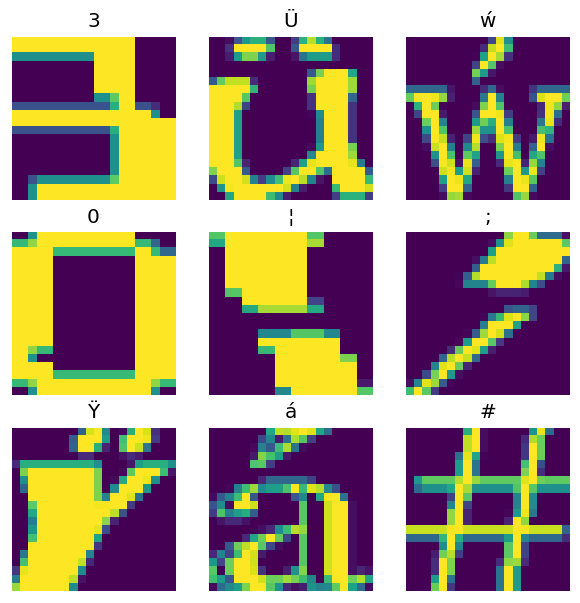

In [64]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 6), dpi=120)

for n in range(9):
    plt.subplot(3, 3, n + 1)
    plt.imshow(features['image'][..., n])
    plt.title(chr(features['m_label'][n]))
    plt.axis('off')